In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
df = pd.read_csv('C:/Users/nhu/OneDrive - Florida International University/PHC_Avd_Bio3/fev1.csv')

In [7]:
df.head()

,Y1,Y0,T,d
0,0.87,0.93,0,NaN
1,1.26,1.27,0,NaN
2,1.54,1.32,0,NaN
3,1.36,1.29,0,NaN
4,1.26,1.35,0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y1      520 non-null    float64
 1   Y0      520 non-null    float64
 2   T       520 non-null    int64  
 3   d       258 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 16.4 KB


In [11]:
df.shape

(520, 4)

In [35]:
#restrict to treated (T=1)
df_T = df[df['T'] == 1]

In [45]:
df_Y0_T = df[df['T'] == 1]["Y0"]
df_Y0_T

262    2.66
263    2.17
264    1.78
265    1.05
266    0.81
       ... 
515    1.59
516    2.46
517    1.69
518    1.27
519    2.75
Name: Y0, Length: 258, dtype: float64

In [46]:
df_Y1_T = df[df['T'] == 1]["Y1"]
df_Y1_T

262    2.60
263    2.05
264    2.17
265    1.06
266    0.96
       ... 
515    1.32
516    2.83
517    1.43
518    1.12
519    2.68
Name: Y1, Length: 258, dtype: float64

In [70]:
##Two sample t test
stats.ttest_ind(df_Y1_T, df_Y0_T, equal_var=False)

Ttest_indResult(statistic=1.506622144080651, pvalue=0.13252919910496355)

In [71]:
###Paired t test
stats.ttest_rel(df_Y1_T, df_Y0_T)

Ttest_relResult(statistic=4.422406009779903, pvalue=1.4419484379792243e-05)

In [12]:
# bootstrap settings
# in this example, obtain 2000 bootstrap samples by drawing 200 observations each sample

np.random.seed(48602)
samples = 2000
draws = 200

In [58]:
boot_sample_Y0 = pd.DataFrame(boot_sample_Y0 )

In [61]:
boot_sample_Y0

,0
0,1.540
1,1.550
2,1.510
3,1.480
4,1.505
...,...
1995,1.440
1996,1.410
1997,1.430
1998,1.410


In [50]:
for i in range(samples):
    boot_sample_Y0 += [df_Y0_T.sample(draws, replace=True).median()]

In [51]:
boot_sample_Y0 = 

[1.54,
 1.55,
 1.51,
 1.48,
 1.505,
 1.415,
 1.435,
 1.41,
 1.37,
 1.47,
 1.52,
 1.4849999999999999,
 1.4449999500000001,
 1.54,
 1.455,
 1.4500000499999999,
 1.4849999999999999,
 1.4400001,
 1.5350000000000001,
 1.44500005,
 1.47,
 1.49,
 1.42,
 1.4299999,
 1.41,
 1.42,
 1.4,
 1.4400001,
 1.4049999999999998,
 1.47,
 1.52,
 1.4849999999999999,
 1.475,
 1.38,
 1.4,
 1.41,
 1.435,
 1.53,
 1.52,
 1.4300000499999999,
 1.435,
 1.415,
 1.42,
 1.4649999999999999,
 1.5350000000000001,
 1.42,
 1.49,
 1.47,
 1.435,
 1.44500005,
 1.4049999999999998,
 1.4400001,
 1.355,
 1.59,
 1.4400001,
 1.42,
 1.38,
 1.4300000499999999,
 1.44500005,
 1.455,
 1.42,
 1.4,
 1.36,
 1.4299999,
 1.36,
 1.47,
 1.455,
 1.54,
 1.41,
 1.45,
 1.41,
 1.41,
 1.42,
 1.4300000499999999,
 1.4649999999999999,
 1.41,
 1.42,
 1.415,
 1.4249999500000001,
 1.4400001,
 1.4400001,
 1.39,
 1.5150000000000001,
 1.4049999999999998,
 1.44500005,
 1.5499999500000001,
 1.505,
 1.415,
 1.44500005,
 1.44500005,
 1.415,
 1.54,
 1.430000049999

In [52]:
boot_sample_Y1 = []

In [53]:
for i in range(samples):
    boot_sample_Y1 += [df_Y1_T.sample(draws, replace=True).median()]

In [55]:
boot_sample_Y1 = pd.DataFrame(boot_sample_Y1)

In [56]:
boot_sample_Y1

,0
0,1.560
1,1.510
2,1.480
3,1.570
4,1.510
...,...
1995,1.530
1996,1.485
1997,1.540
1998,1.565


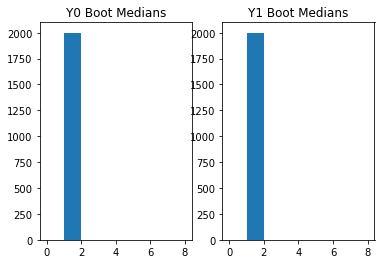

In [75]:
fig,axs = plt.subplots(1,2)

axs[0].hist(boot_sample_Y0, bins=range(0,9))
axs[0].set_title('Y0 Boot Medians')

axs[1].hist(boot_sample_Y1, bins=range(0,9))
axs[1].set_title('Y1 Boot Medians')

plt.show()

In [68]:
print(boot_sample_Y0.mean())
print(boot_sample_Y1.mean())

0    1.445435
dtype: float64
0    1.51551
dtype: float64


In [76]:
stats.ttest_ind(boot_sample_Y0, boot_sample_Y1, equal_var=False)

Ttest_indResult(statistic=array([-43.6733533]), pvalue=array([0.]))